In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import operator
from scipy.optimize import minimize
import math

In [9]:
def gen_dx(mu_real,sig_real,dt,N):
    N=np.int64(N)
    dW=np.sqrt(dt)*np.random.normal(0, 1, N)
    e= mu_real*dt+ sig_real*dW
    return(e)

In [10]:
def liklihood(param,data, disc):
    L=0
    e=data
    N,dt=disc;
    N=np.int64(N)
    mu,sig =param;
    for i in range(0,N):
        L = L  - (e[i]-mu*dt )**2/(2*dt*sig**2) -0.5*np.log(2*math.pi*sig**2*dt)
    return(-1*L)

In [11]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label='slope='+str(slope))

In [12]:
def covergence_test(disc ,param_real, param_initial):
    
    N,dt=disc;
    mu_real,sig_real=param_real
    mu_initial,sig_initial=param_initial
    
    e=gen_dx(mu_real,sig_real,dt,N)
    
    args=(e,disc)
    x0=param_initial
    bnds = ((None, None), (1e-5, None))
    
    min_param=minimize(liklihood,x0,args,bounds=bnds);min_param
    #min_param=minimize(liklihood,x0,args,method='SLSQP',bounds=bnds,\
                   #tol=1e-24,options={  'ftol': 1e-24,  'eps': 1e-12});min_param
    error = np.divide ( abs(min_param.x - param_real),param_real )
    
    return(min_param.x, error)

In [19]:
#varying number of samples infinte horizon

#N_test=np.array([5,10,50,100,500,1000,5000,10000,50000,100000])  #np.arange(100,10000,1000)
N_test=np.array([5,10,50,100,500,1000,5000,10000,50000,100000,500000])  #np.arange(100,10000,1000)
dt_test= np.divide(1,N_test**(1/4))
err_var1=np.zeros((len(N_test),2))
#res=np.zeros((len(N_test),2))

param_real_test=np.array([100,10])
param_initial_test= np.array([13,7])


for i in range(0,len(N_test)):
    disc_test=np.array([N_test[i],dt_test[i] ] )
    _,err_var1[i,:]=covergence_test(disc_test,param_real_test,param_initial_test)


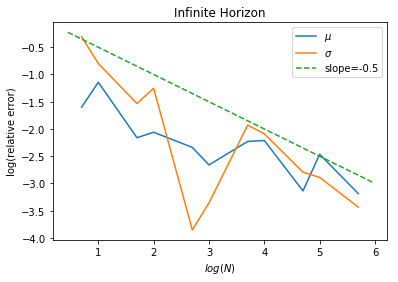

In [20]:
plt.title('Infinite Horizon')
plt.xlabel('$log(N)$')
plt.ylabel('log(relative error)')
plt.plot(np.log10(N_test),  np.log10(err_var1[:,0]), label='$\mu$')
plt.plot(np.log10(N_test),  np.log10(err_var1[:,1]), label='$\sigma$')
abline(-0.5,0)
plt.legend()
plt.savefig('case13test18.pdf')